### Predicting Wins in Baseball
_Authors: Jerry Scott Sheehan_

In [889]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import ctypes
import shutil
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

## Load Data

There are two data sources.  
- baseball_stats: This one includes all of the teams stats from the season 1998-2017.  I chose this time period because the most recent new franchises began in 1998.  This means all 30 teams will have played the same number of games over that time.
- baseball_wins: This one includes each of the 30 teams wins per season from 1998-2017.

In [890]:
#Define the path for each of the datasets
baseball_stats = "./data/Baseball_Stats.csv"
baseball_wins  = "./data/Baseball_Wins.csv"

In [891]:
#Read in data with pandas function read.csv

In [892]:
stats = pd.read_csv(baseball_stats)
stats.head()

,Team,HR,R,RBI,IBB,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,Pitches,BB%,K%,OBP,SLG,OPS,ISO,BABIP,LD%,GB%,FB%,IFFB%,HR/FB,wOBA,wRAA,wRC,Pos,RAR,wRC+,Clutch,O-Swing%,Z-Swing%,Swing%,Age Rng,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,BsR
0,Yankees,4049,16169,15498,678,1278,902,551,2559,2045,665,0.268,32432,26060,14508,399336,9.50%,17.50%,0.344,0.440,0.784,0.172,0.298,19.90%,44.40%,35.70%,10.00%,13.20%,0.341,1665.6,16277,-308.8,4658.4,108,-12.98,24.70%,66.00%,44.20%,20 - 46,42.50%,32.50%,25.10%,17.00%,53.80%,29.20%,63.00%,88.20%,80.80%,47.20%,48.70%,63.0
1,Red Sox,3625,16128,15375,815,1123,992,451,2561,1588,556,0.272,31207,27833,15241,408834,9.20%,17.50%,0.344,0.441,0.786,0.169,0.307,20.50%,42.00%,37.50%,10.30%,11.10%,0.341,1671.1,16388,-307.2,4773.4,106,-22.10,24.90%,64.80%,44.00%,20 - 44,42.20%,32.60%,25.30%,15.70%,54.10%,30.30%,64.60%,88.40%,81.40%,48.00%,49.20%,-54.8
2,Rockies,3476,15610,14830,855,942,850,1370,2380,1812,815,0.272,31485,24210,15063,389168,8.40%,18.70%,0.338,0.438,0.776,0.166,0.314,21.30%,44.50%,34.20%,9.30%,11.90%,0.336,1105.9,15624,725.3,2791.8,89,-30.66,26.80%,67.80%,46.70%,20 - 49,38.30%,34.50%,27.20%,17.00%,54.80%,28.20%,62.20%,86.00%,79.00%,48.70%,50.30%,18.7
3,Rangers,3936,15800,15059,634,1106,934,679,2412,1864,727,0.269,31106,26773,14880,390531,8.20%,18.00%,0.333,0.441,0.774,0.173,0.301,20.50%,42.80%,36.80%,10.10%,12.30%,0.335,1093.6,15579,-305.5,3840.1,100,-17.39,27.00%,67.00%,46.20%,19 - 45,41.10%,33.40%,25.50%,16.10%,54.50%,29.40%,61.60%,86.80%,79.10%,47.90%,49.90%,110.4
4,Indians,3446,15187,14483,619,1185,940,734,2481,1773,714,0.264,31110,26009,14632,396036,9.00%,18.40%,0.336,0.425,0.761,0.161,0.302,20.40%,43.40%,36.20%,9.70%,10.80%,0.332,738.7,15254,-303.6,4066.0,103,-16.09,24.80%,65.80%,44.60%,20 - 43,43.00%,32.00%,25.00%,15.80%,55.30%,28.90%,62.40%,87.50%,80.30%,48.30%,49.20%,36.1


In [893]:
wins=pd.read_csv(baseball_wins)
wins.head()

,Year,G,ARI,ATL,BLA,BAL,BOS,CHC,CHW,CIN,CLE,COL,DET,HOU,KCR,LAA,LAD,MIA,MIL,MIN,NYM,NYY,OAK,PHI,PIT,SDP,SFG,SEA,STL,TBR,TEX,TOR,WSN
0,2017,162,93,72,NaN,75,93,92,67,68,102,87,64,101,80,80,104,77,86,85,70,91,75,66,75,71,64,78,83,80,78,76,97
1,2016,162,69,68,NaN,89,93,103,78,68,94,75,86,84,81,74,91,79,73,59,87,84,69,71,78,68,87,86,86,68,95,89,95
2,2015,162,79,67,NaN,81,78,97,76,64,81,68,74,86,95,85,92,71,68,83,90,87,68,63,98,74,84,76,100,80,88,93,83
3,2014,162,64,79,NaN,96,71,73,73,76,85,66,90,70,89,98,94,77,82,70,79,84,88,73,88,77,88,87,90,77,67,83,96
4,2013,163,81,96,NaN,85,97,66,63,90,92,74,93,51,86,78,92,62,74,66,74,85,96,73,94,76,76,71,97,92,91,74,86


### Functions

Below are all the functions created for the analysis 

In [894]:
#Creates a pop-up box with the inputted message
def Message_Box(msg):
    ctypes.windll.user32.MessageBoxW(0, msg, "Error:", 1);
    return

In [895]:
#Checks that the df has the correct number of rows.  If it does not, it throws a pop-up box saying so
def shape_chk(df, rownum):
    if df.shape[0] != rownum:
        Message_Box("There should be " + str(rownum) + " rows in the " + df.name + " dataset but instead there are " + str(df.shape[0]))
    return df

In [896]:
#Checks that a value is included in a list or column
def valuechk(value, in_ ):
    if value not in in_:
        Message_Box("The value " + str(value) + " is missing from " + str(in_))
    

In [897]:
#Sets the index to the column specified
def df_index(df, col, value):
    df.set_index(col, inplace=True)  
    valuechk(value, df.index)
    return df

In [898]:
#Checks if there are any outliers in the df
def ckf4outliers(df, col):
    outliers = df[df[col] > df[col].mean() + 3 * df[col].std()]
    outliers = outliers + (df[df[col] > df[col].mean() + 3 * df[col].std()])
    print(outliers)

In [899]:
#Drops columns and checks that they were properly dropped
def dropcolschk(df, cols):
    scolnum = df.shape[1]
    dropnum = len(cols)
    df.drop(cols, inplace=True, axis=1)
    finnum = df.shape[1]
    if finnum != scolnum - dropnum:
        Message_Box(str(dropnum) + " columns were dropped so there should be " + str(scolnum - dropnum) + " columns.  Instead there are " + str(finnum))
    

In [900]:
#Checks to see if there are any null values in the df
def chk4nulls(df):
    for i in range(0, len(df.columns)):
        if df.isnull().sum()[i] > 0:
            Message_Box("There are " + str(df.isnull().sum()[i]) + " blanks in the column " + str(df.columns[i]) +" of the dataframe " + df.name)
    return df

In [901]:
#Converts the datatype from a percentage to a float
def chgdtype(df):
    for column_name in df.columns:
        if column_name.endswith("Pct"):
            df[column_name] = df[column_name].str.rstrip('%').astype('float') / 100.0
    return df

In [902]:
#Outputs a plot with the inputted data
def plotfunct(xvar, yvar, data):
    sns.lmplot(x=xvar, y=yvar, data=data, ci=None, fit_reg=True);

In [903]:
#Outputs a scatter plot with the given data and labels
def scatter(x,y, title, xlabel, ylabel):
    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

In [904]:
#Does a train/test split on the data and then outputs a scatterplot
def train(pct, num, title, xlabel, ylabel):
    X_train = {}
    X_test = {}
    y_train = {}
    y_test = {}
    y_pred = {}
     
    X_train[num], X_test[num], y_train[num], y_test[num] = train_test_split(X, y, test_size = pct)
    lr = LinearRegression()
    lr.fit(X_train[num], y_train[num])
    
    y_pred[num] = lr.predict(X_test[num])

    print(metrics.mean_squared_error(y_train[num], lr.predict(X_train[num])))
    print(metrics.mean_squared_error(y_test[num], y_pred[num]))
    
    i=0
    a=0
    for i in range(0,1000):
        a = a+ lr.score(X_test[num], y_test[num])
        i=i+1
    print(a/1000)
    scatter(y_test[num], y_pred[num], title, xlabel, ylabel)
    

In [905]:
#Does a cross validation on X and y
def crossval(X,y):
    mse_values = []
    scores = []
    n = 0

    for train_index, test_index in kf.split(X, y):             
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
    
        lr = LinearRegression().fit(X_train, y_train)
    
        y_pred = lr.predict(X_test)
        mse = metrics.mean_squared_error(y_test, y_pred)
        mse_values.append(mse)
    
        r2 = lr.score(X_test, y_test)
        scores.append(lr.score(X, y))

        n += 1

    print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
    print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

    predictions = cross_val_predict(lr, X, y, cv=30)
    plt.scatter(y, predictions)
    plt.title('Predictions vs Actual');
    plt.xlabel("Actual");
    plt.ylabel("Predictions");

In [1001]:
#Outputs the actual predictions for the spcified team using the model
def prediction(X, y, splits, RAR, RC_plus, OBP, BB_Pct, ratio1, ratio2, ratio3, Team):
    kf = model_selection.KFold(n_splits=splits, shuffle=True)
    mse_values = []
    scores = []
    n = 0

    for train_index, test_index in kf.split(X, y):             
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]

        lr = LinearRegression().fit(X_train, y_train)

    print(Team + ": " + str((lr.predict([[(RAR*ratio1)/ratio2,RC_plus,OBP,BB_Pct]])/20)*ratio3))

## Exploratory Data Analysis

### Start with the Stats dataset

In [906]:
#Set the name of the dataframe so this can be used to reference it in the functions above
stats.name = "stats"

#### Shape

In [907]:
#There should be 30 rows, since there are 30 teams.
shape_chk(stats, 30);

#### Index

In [908]:
#Change the index to use the team names rather than the row number default
df_index(stats, "Team", "Dodgers");

#### Teams

In [909]:
#Lets see what the team names are
stats.index

Index(['Yankees', 'Red Sox', 'Rockies', 'Rangers', 'Indians', 'Cardinals',
       'Blue Jays', 'Tigers', 'White Sox', 'Angels', 'Orioles', 'Braves',
       'Athletics', 'Phillies', 'Diamondbacks', 'Astros', 'Brewers', 'Reds',
       'Cubs', 'Twins', 'Giants', 'Dodgers', 'Devil Rays', 'Mariners',
       'Royals', 'Mets', 'Expos', 'Marlins', 'Pirates', 'Padres'],
      dtype='object', name='Team')

Looking at the teams two that stand out are the Devil Rays and Expos since they are no longer the names of their respective teams.  They are now the Rays and Nationals.  The franchises are still the same so we should check that this data is based on the franchise and not just the team name.

Going to check this by looking at the number of runs and seeing if those teams have much fewer than the others.  Since the Expos became the Nationals in 2005 and the Devil Rays became the Rays in 2008 they would have much fewer runs scored in this time unless this data is using the franchise instead of just the team name.

In [910]:
ckf4outliers(stats, "R");

Empty DataFrame
Columns: [HR, R, RBI, IBB, HBP, SF, SH, GDP, SB, CS, AVG, GB, FB, LD, Pitches, BB%, K%, OBP, SLG, OPS, ISO, BABIP, LD%, GB%, FB%, IFFB%, HR/FB, wOBA, wRAA, wRC, Pos, RAR, wRC+, Clutch, O-Swing%, Z-Swing%, Swing%, Age Rng, Pull%, Cent%, Oppo%, Soft%, Med%, Hard%, O-Contact%, Z-Contact%, Contact%, Zone%, F-Strike%, BsR]
Index: []


There are no outliers so the data must be using the franchise.

#### Columns

In [911]:
#Taking a look at all columns
stats.columns

Index(['HR', 'R', 'RBI', 'IBB', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS', 'AVG',
       'GB', 'FB', 'LD', 'Pitches', 'BB%', 'K%', 'OBP', 'SLG', 'OPS', 'ISO',
       'BABIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'wOBA', 'wRAA', 'wRC',
       'Pos', 'RAR', 'wRC+', 'Clutch', 'O-Swing%', 'Z-Swing%', 'Swing%',
       'Age Rng', 'Pull%', 'Cent%', 'Oppo%', 'Soft%', 'Med%', 'Hard%',
       'O-Contact%', 'Z-Contact%', 'Contact%', 'Zone%', 'F-Strike%', 'BsR'],
      dtype='object')

#### Drop Columns

We most likely do not need repetitive variables such as GB and GB%.  The same applies for FB and FB% as well as LD and LD%.  We should keep those that are percentages as this will eliminate factors that could bias on our data such as number of at bats.  More at bats would most likely result in more ground balls.  By using the percent we can view just the added benefit of seeing their groundball ratio.

Based on this we will drop GB, FB, and LD

In [912]:
dropcolschk(stats, ['GB', 'FB', 'LD'])


#### - Rename Columns

It would be better to rename the columns that use '%', "/", or "+" in the column name. Below will look at all column names in our dataframe and find those that end in %.  It will then take these column name, remove the % and add '_Pct' instead.

In [913]:
for column_name in stats.columns:
    if column_name.endswith('%'):
        stats = stats.rename(columns={column_name: column_name.strip('%')+'_Pct'})
    elif "/" in column_name:
        stats = stats.rename(columns={column_name: column_name.replace("/", "_")+'_Pct'})
    elif "+" in column_name:
        stats = stats.rename(columns={column_name: column_name.replace("+", "_plus")})

In [914]:
stats.columns

Index(['HR', 'R', 'RBI', 'IBB', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS', 'AVG',
       'Pitches', 'BB_Pct', 'K_Pct', 'OBP', 'SLG', 'OPS', 'ISO', 'BABIP',
       'LD_Pct', 'GB_Pct', 'FB_Pct', 'IFFB_Pct', 'HR_FB_Pct', 'wOBA', 'wRAA',
       'wRC', 'Pos', 'RAR', 'wRC_plus', 'Clutch', 'O-Swing_Pct', 'Z-Swing_Pct',
       'Swing_Pct', 'Age Rng', 'Pull_Pct', 'Cent_Pct', 'Oppo_Pct', 'Soft_Pct',
       'Med_Pct', 'Hard_Pct', 'O-Contact_Pct', 'Z-Contact_Pct', 'Contact_Pct',
       'Zone_Pct', 'F-Strike_Pct', 'BsR'],
      dtype='object')

#### Check for nulls

In [915]:
#This will check that there are no null values coming through
chk4nulls(stats);

No null values so good here

#### Data Types

In [916]:
#Check the data types
stats.dtypes

HR                 int64
R                  int64
RBI                int64
IBB                int64
HBP                int64
SF                 int64
SH                 int64
GDP                int64
SB                 int64
CS                 int64
AVG              float64
Pitches            int64
BB_Pct            object
K_Pct             object
OBP              float64
SLG              float64
OPS              float64
ISO              float64
BABIP            float64
LD_Pct            object
GB_Pct            object
FB_Pct            object
IFFB_Pct          object
HR_FB_Pct         object
wOBA             float64
wRAA             float64
wRC                int64
Pos              float64
RAR              float64
wRC_plus           int64
Clutch           float64
O-Swing_Pct       object
Z-Swing_Pct       object
Swing_Pct         object
Age Rng           object
Pull_Pct          object
Cent_Pct          object
Oppo_Pct          object
Soft_Pct          object
Med_Pct           object


A lot of these are percentages, but considered objects.  We will most likely want them to become floats so they are easier to use.  The following will change them to being percentages.

In [917]:
#Change the dataypes to floats
chgdtype(stats);

#Take a look at the first 5 of this example column
stats["F-Strike_Pct"].head()

Team
Yankees    0.487
Red Sox    0.492
Rockies    0.503
Rangers    0.499
Indians    0.492
Name: F-Strike_Pct, dtype: float64

In [918]:
stats["F-Strike_Pct"].dtype

dtype('float64')

This has successfuly converted the percent values to floats

#### Last Check

Take one last look at the data now to see if anything stands out needing to be corrected

In [919]:
pd.options.display.max_columns = None
stats.head()

,HR,R,RBI,IBB,HBP,SF,SH,GDP,SB,CS,AVG,Pitches,BB_Pct,K_Pct,OBP,SLG,OPS,ISO,BABIP,LD_Pct,GB_Pct,FB_Pct,IFFB_Pct,HR_FB_Pct,wOBA,wRAA,wRC,Pos,RAR,wRC_plus,Clutch,O-Swing_Pct,Z-Swing_Pct,Swing_Pct,Age Rng,Pull_Pct,Cent_Pct,Oppo_Pct,Soft_Pct,Med_Pct,Hard_Pct,O-Contact_Pct,Z-Contact_Pct,Contact_Pct,Zone_Pct,F-Strike_Pct,BsR
Team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Yankees,4049,16169,15498,678,1278,902,551,2559,2045,665,0.268,399336,0.095,0.175,0.344,0.440,0.784,0.172,0.298,0.199,0.444,0.357,0.100,0.132,0.341,1665.6,16277,-308.8,4658.4,108,-12.98,0.247,0.660,0.442,20 - 46,0.425,0.325,0.251,0.170,0.538,0.292,0.630,0.882,0.808,0.472,0.487,63.0
Red Sox,3625,16128,15375,815,1123,992,451,2561,1588,556,0.272,408834,0.092,0.175,0.344,0.441,0.786,0.169,0.307,0.205,0.420,0.375,0.103,0.111,0.341,1671.1,16388,-307.2,4773.4,106,-22.10,0.249,0.648,0.440,20 - 44,0.422,0.326,0.253,0.157,0.541,0.303,0.646,0.884,0.814,0.480,0.492,-54.8
Rockies,3476,15610,14830,855,942,850,1370,2380,1812,815,0.272,389168,0.084,0.187,0.338,0.438,0.776,0.166,0.314,0.213,0.445,0.342,0.093,0.119,0.336,1105.9,15624,725.3,2791.8,89,-30.66,0.268,0.678,0.467,20 - 49,0.383,0.345,0.272,0.170,0.548,0.282,0.622,0.860,0.790,0.487,0.503,18.7
Rangers,3936,15800,15059,634,1106,934,679,2412,1864,727,0.269,390531,0.082,0.180,0.333,0.441,0.774,0.173,0.301,0.205,0.428,0.368,0.101,0.123,0.335,1093.6,15579,-305.5,3840.1,100,-17.39,0.270,0.670,0.462,19 - 45,0.411,0.334,0.255,0.161,0.545,0.294,0.616,0.868,0.791,0.479,0.499,110.4
Indians,3446,15187,14483,619,1185,940,734,2481,1773,714,0.264,396036,0.090,0.184,0.336,0.425,0.761,0.161,0.302,0.204,0.434,0.362,0.097,0.108,0.332,738.7,15254,-303.6,4066.0,103,-16.09,0.248,0.658,0.446,20 - 43,0.430,0.320,0.250,0.158,0.553,0.289,0.624,0.875,0.803,0.483,0.492,36.1


There are a few things that stand out here.  First Age Rng doesnt look as though it would be too helpful.  If it were the average age or gave us more of a distribution it could, but it only includes the max and min making it possible that a team has an outlier or two that would skew this variable.  Better to eliminate this variable.

Another note is that Pos does not make sense.  Pos stands for position which should be categorical, but instead is coming up as a numeric value with negative numbers.  We should remove this column.

In [920]:
dropcolschk(stats, ['Age Rng', 'Pos'])

### The Wins Dataset

In [921]:
#Set the name of the dataframe so this can be used to reference it in the functions above
wins.name = "wins"

#### Shape

In [922]:
#There should be 20 rows in this table since there are 20 years 
#worth of data and each row is a year
shape_chk(wins, 20);

#### Columns

In [923]:
#Take a look at all the columns in here
wins.columns

Index(['Year', 'G', 'ARI', 'ATL', 'BLA', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN',
       'CLE', 'COL', 'DET', 'HOU', 'KCR', 'LAA', 'LAD', 'MIA', 'MIL', 'MIN',
       'NYM', 'NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SFG', 'SEA', 'STL', 'TBR',
       'TEX', 'TOR', 'WSN'],
      dtype='object')

BLA is an old team that has not played since before 1998 so we can remove this column.  First we need to double check that this is all blank.

In [924]:
chk4nulls(wins);

This returns a pop-up box saying there are 20 nulls values in the BLA column.  Since there are rows, this column is all blank.  No other columns are all blank so we should drop the BLA column.

In [925]:
dropcolschk(wins, ["BLA"])

Take another look now at the columns so see if there are any others to drop.

In [926]:
wins.columns

Index(['Year', 'G', 'ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE',
       'COL', 'DET', 'HOU', 'KCR', 'LAA', 'LAD', 'MIA', 'MIL', 'MIN', 'NYM',
       'NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SFG', 'SEA', 'STL', 'TBR', 'TEX',
       'TOR', 'WSN'],
      dtype='object')

We don't need to sum Year and G as these are not Team names so we can remove these columns.

In [927]:
dropcolschk(wins, ["Year", "G"])

#### - Rename Columns

The stats dataframe has all of team names with their full names rather than acronyms.  In order to merge these datasets they need to line up so will change the acronyms here to be the full team now.

In [928]:
Acronyms = ['ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW','CIN', 'CLE', 'COL', 'DET', 'HOU', 'KCR', 'LAA','LAD', 'MIA', 'MIL', 
            'MIN', 'NYM', 'NYY', 'OAK','PHI', 'PIT', 'SDP', 'SFG', 'SEA', 'STL', 'TBR', 'TEX', 'TOR', 'WSN']

Fullnames = ['Diamondbacks', 'Braves', 'Orioles', 'Red Sox', 'Cubs', 'White Sox','Reds',  'Indians', 'Rockies', 'Tigers', 
             'Astros', 'Royals', 'Angels', 'Dodgers', 'Marlins', 'Brewers', 'Twins', 'Mets', 'Yankees', 'Athletics',
             'Phillies', 'Pirates', 'Padres', 'Giants', 'Mariners', 'Cardinals', 'Devil Rays', 'Rangers', 'Blue Jays', 'Expos']


In [929]:
for i in range(0, len(wins.columns)):
    wins=wins.rename(columns={Acronyms[i]: Fullnames[i]})

In [930]:
#Check that the correct fullnames are in there now
valuechk("Dodgers", wins.columns)
  

#### Data Types

In [931]:
#Take a look at the data types here
wins.dtypes

Diamondbacks    int64
Braves          int64
Orioles         int64
Red Sox         int64
Cubs            int64
White Sox       int64
Reds            int64
Indians         int64
Rockies         int64
Tigers          int64
Astros          int64
Royals          int64
Angels          int64
Dodgers         int64
Marlins         int64
Brewers         int64
Twins           int64
Mets            int64
Yankees         int64
Athletics       int64
Phillies        int64
Pirates         int64
Padres          int64
Giants          int64
Mariners        int64
Cardinals       int64
Devil Rays      int64
Rangers         int64
Blue Jays       int64
Expos           int64
dtype: object

These are all integers which is what we want because we are dealing with wins.

#### Sum

What we are really looking for with this table is the total number of wins for each team.  Now that the table is cleaned up we can sum all the columns to find the number of wins for each team.
wins_tot will be a row with the summed wins from 1998-2018 for each team.

In [932]:
wins_tot=wins.append(wins.sum(numeric_only=True), ignore_index=True)

In [933]:
#We only want the totals which is the last row, so set this dataframe equal to the tail
wins_tot = wins_tot.tail(1)
wins_tot

,Diamondbacks,Braves,Orioles,Red Sox,Cubs,White Sox,Reds,Indians,Rockies,Tigers,Astros,Royals,Angels,Dodgers,Marlins,Brewers,Twins,Mets,Yankees,Athletics,Phillies,Pirates,Padres,Giants,Mariners,Cardinals,Devil Rays,Rangers,Blue Jays,Expos
20,1596,1757,1509,1786,1602,1621,1557,1673,1508,1534,1610,1449,1725,1743,1516,1528,1582,1630,1895,1696,1628,1469,1544,1701,1593,1791,1500,1657,1631,1548


### Merging the Dataframes

For this analysis we need to merge the two datasets together to get the predictor column "wins" onto the stats dataset where we will choose the features from.  To do this we need to sum all the rows to get the total number of wins and then transpose the table.

#### Transpose

In [934]:
wins_tott=np.transpose(wins_tot)

In [935]:
wins_tott.shape

(30, 1)

This has been transposed since there is only 1 column and 30 rows

#### Columns

In [936]:
#Lets see what the columns look like
wins_tott.columns

RangeIndex(start=20, stop=21, step=1)

Taking a look at the columns we see that the only one is called 20.  This column represents the wins for each team so we will call it wins.

In [937]:
wins_tott=wins_tott.rename(columns={20: 'Wins'})

In [938]:
valuechk("Wins", wins_tott.columns)

#### The Merge

The final step is to merge the stats and wins_tott datasets together which can be done using the .merge functions from pandas and using the indexes (Team name) from each dataset.

In [939]:
bball_data = pd.merge(wins_tott, stats, left_index=True, right_index=True)
bball_data.head()

,Wins,HR,R,RBI,IBB,HBP,SF,SH,GDP,SB,CS,AVG,Pitches,BB_Pct,K_Pct,OBP,SLG,OPS,ISO,BABIP,LD_Pct,GB_Pct,FB_Pct,IFFB_Pct,HR_FB_Pct,wOBA,wRAA,wRC,RAR,wRC_plus,Clutch,O-Swing_Pct,Z-Swing_Pct,Swing_Pct,Pull_Pct,Cent_Pct,Oppo_Pct,Soft_Pct,Med_Pct,Hard_Pct,O-Contact_Pct,Z-Contact_Pct,Contact_Pct,Zone_Pct,F-Strike_Pct,BsR
Diamondbacks,1596,3303,14285,13639,918,934,870,1083,2265,1805,720,0.258,388205,0.087,0.190,0.327,0.418,0.745,0.160,0.298,0.204,0.444,0.353,0.108,0.108,0.323,-182.2,14242,3192.3,91,-30.27,0.260,0.657,0.451,0.398,0.339,0.263,0.169,0.541,0.290,0.609,0.867,0.789,0.480,0.498,39.3
Braves,1757,3209,14304,13623,950,958,811,1316,2541,1593,695,0.261,383269,0.088,0.183,0.331,0.412,0.743,0.151,0.300,0.205,0.453,0.342,0.094,0.109,0.324,-168.8,14277,4235.7,96,-11.62,0.267,0.685,0.467,0.398,0.338,0.264,0.170,0.541,0.289,0.622,0.860,0.789,0.479,0.501,-43.0
Orioles,1509,3567,14258,13614,554,1034,847,606,2566,1621,667,0.262,381742,0.077,0.174,0.324,0.420,0.743,0.157,0.293,0.197,0.434,0.369,0.112,0.113,0.324,-87.9,14232,3158.9,97,-16.06,0.281,0.673,0.469,0.422,0.324,0.254,0.173,0.544,0.284,0.632,0.878,0.801,0.480,0.504,-91.6
Red Sox,1786,3625,16128,15375,815,1123,992,451,2561,1588,556,0.272,408834,0.092,0.175,0.344,0.441,0.786,0.169,0.307,0.205,0.420,0.375,0.103,0.111,0.341,1671.1,16388,4773.4,106,-22.10,0.249,0.648,0.440,0.422,0.326,0.253,0.157,0.541,0.303,0.646,0.884,0.814,0.480,0.492,-54.8
Cubs,1602,3448,14021,13351,836,1089,757,1240,2360,1430,670,0.257,384816,0.085,0.193,0.326,0.416,0.742,0.160,0.296,0.205,0.440,0.355,0.096,0.115,0.323,-248.4,14130,3821.4,93,-52.59,0.274,0.680,0.469,0.410,0.329,0.261,0.172,0.546,0.282,0.599,0.863,0.782,0.479,0.505,-62.1


We now have our dataset set up correctly.  Each team has data from 1998-2018 for multiple statistics as well as the total number of wins for that time period.  These statistics can now be used to predict the number of wins a team will get in the Analysis and Model section.

## Analysis and Model

### Correlation

First we need to find which variables are most related to our predictor variable, Wins.  This can be done by looking into the correlations of each variable with Wins.  Using the .corr() function we can see these correlations.

In [940]:
bball_correlations = bball_data.corr();
bball_correlations['Wins'].sort_values(ascending = False).head()


Wins        1.000000
RAR         0.851050
wRC_plus    0.760739
OBP         0.719096
BB_Pct      0.651476
Name: Wins, dtype: float64

RAR, wRC_plus, and OBP all have positive correlations over 0.7, which is considered a good correlation.  If needed we can also look at BB_Pct  which has a positive correlations over .65 meaning it is at least decently well correlated. 

In [941]:
bball_correlations['Wins'].sort_values(ascending = False).tail()

CS             -0.377182
K_Pct          -0.432661
Swing_Pct      -0.436613
O-Swing_Pct    -0.561483
F-Strike_Pct   -0.637404
Name: Wins, dtype: float64

F-Strike_Pct (First Strike Percentage) has a correlation under -.6 which is a decently strong correlation as well. These make sense being negative because:
- getting the first strike on a batter significantly decreases the batter’s chance of success and likewise increases a pitcher’s chance of success. 


#### - Plots

To get a better visual of these variables and their relationship with Wins, we will plot each variable against Wins.

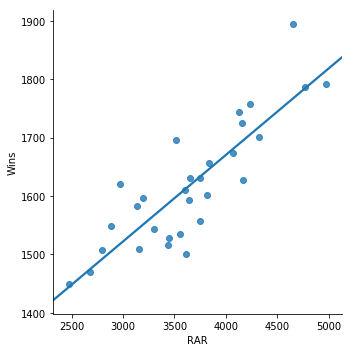

In [942]:
plotfunct('RAR', 'Wins', bball_data)

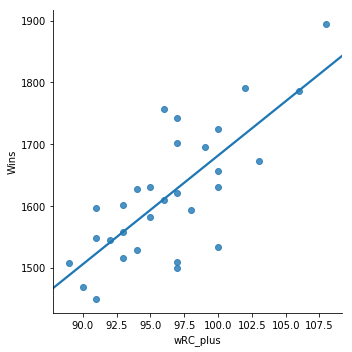

In [943]:
plotfunct('wRC_plus', 'Wins', bball_data)

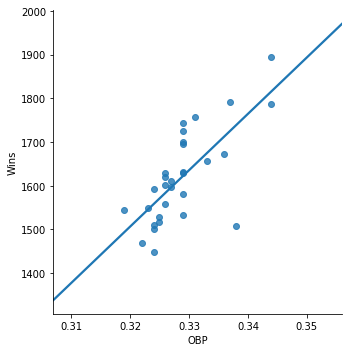

In [944]:
plotfunct('OBP', 'Wins', bball_data)

RAR, wRC_plus, and OBP all appear to have strong linear relationships with Wins so they are good variables to use moving forward with our model. These will then be our feature columns and y will be our predictor variable which is Wins.

#### Fix RAR column

Before continuing it would be best to divide RAR by 20 as the way the dataset is using it is by adding up all the yearly RAR values for each team.  This way we can view the RAR for each year.

In [945]:
bball_data["RAR_yr"] = bball_data[["RAR"]]/20
bball_correlations = bball_data.corr();

In [946]:
valuechk("RAR_yr", bball_data.columns)

In [947]:
bball_data

,Wins,HR,R,RBI,IBB,HBP,SF,SH,GDP,SB,CS,AVG,Pitches,BB_Pct,K_Pct,OBP,SLG,OPS,ISO,BABIP,LD_Pct,GB_Pct,FB_Pct,IFFB_Pct,HR_FB_Pct,wOBA,wRAA,wRC,RAR,wRC_plus,Clutch,O-Swing_Pct,Z-Swing_Pct,Swing_Pct,Pull_Pct,Cent_Pct,Oppo_Pct,Soft_Pct,Med_Pct,Hard_Pct,O-Contact_Pct,Z-Contact_Pct,Contact_Pct,Zone_Pct,F-Strike_Pct,BsR,RAR_yr
Diamondbacks,1596,3303,14285,13639,918,934,870,1083,2265,1805,720,0.258,388205,0.087,0.190,0.327,0.418,0.745,0.160,0.298,0.204,0.444,0.353,0.108,0.108,0.323,-182.2,14242,3192.3,91,-30.27,0.260,0.657,0.451,0.398,0.339,0.263,0.169,0.541,0.290,0.609,0.867,0.789,0.480,0.498,39.3,159.615
Braves,1757,3209,14304,13623,950,958,811,1316,2541,1593,695,0.261,383269,0.088,0.183,0.331,0.412,0.743,0.151,0.300,0.205,0.453,0.342,0.094,0.109,0.324,-168.8,14277,4235.7,96,-11.62,0.267,0.685,0.467,0.398,0.338,0.264,0.170,0.541,0.289,0.622,0.860,0.789,0.479,0.501,-43.0,211.785
Orioles,1509,3567,14258,13614,554,1034,847,606,2566,1621,667,0.262,381742,0.077,0.174,0.324,0.420,0.743,0.157,0.293,0.197,0.434,0.369,0.112,0.113,0.324,-87.9,14232,3158.9,97,-16.06,0.281,0.673,0.469,0.422,0.324,0.254,0.173,0.544,0.284,0.632,0.878,0.801,0.480,0.504,-91.6,157.945
Red Sox,1786,3625,16128,15375,815,1123,992,451,2561,1588,556,0.272,408834,0.092,0.175,0.344,0.441,0.786,0.169,0.307,0.205,0.420,0.375,0.103,0.111,0.341,1671.1,16388,4773.4,106,-22.10,0.249,0.648,0.440,0.422,0.326,0.253,0.157,0.541,0.303,0.646,0.884,0.814,0.480,0.492,-54.8,238.670
Cubs,1602,3448,14021,13351,836,1089,757,1240,2360,1430,670,0.257,384816,0.085,0.193,0.326,0.416,0.742,0.160,0.296,0.205,0.440,0.355,0.096,0.115,0.323,-248.4,14130,3821.4,93,-52.59,0.274,0.680,0.469,0.410,0.329,0.261,0.172,0.546,0.282,0.599,0.863,0.782,0.479,0.505,-62.1,191.070
White Sox,1621,3717,14551,13943,495,1161,850,779,2496,1876,873,0.262,381881,0.079,0.176,0.326,0.425,0.750,0.163,0.292,0.200,0.434,0.366,0.116,0.119,0.326,191.3,14445,2971.5,97,-13.15,0.277,0.673,0.468,0.422,0.313,0.266,0.179,0.546,0.276,0.630,0.874,0.799,0.483,0.503,-143.7,148.575
Reds,1557,3556,14148,13489,867,1187,792,1319,2242,1999,773,0.256,386976,0.086,0.195,0.326,0.415,0.742,0.160,0.295,0.207,0.436,0.358,0.099,0.119,0.323,-261.5,14188,3747.5,93,-16.35,0.267,0.680,0.463,0.400,0.333,0.266,0.175,0.547,0.278,0.605,0.860,0.783,0.476,0.507,73.8,187.375
Indians,1673,3446,15187,14483,619,1185,940,734,2481,1773,714,0.264,396036,0.090,0.184,0.336,0.425,0.761,0.161,0.302,0.204,0.434,0.362,0.097,0.108,0.332,738.7,15254,4066.0,103,-16.09,0.248,0.658,0.446,0.430,0.320,0.250,0.158,0.553,0.289,0.624,0.875,0.803,0.483,0.492,36.1,203.300
Rockies,1508,3476,15610,14830,855,942,850,1370,2380,1812,815,0.272,389168,0.084,0.187,0.338,0.438,0.776,0.166,0.314,0.213,0.445,0.342,0.093,0.119,0.336,1105.9,15624,2791.8,89,-30.66,0.268,0.678,0.467,0.383,0.345,0.272,0.170,0.548,0.282,0.622,0.860,0.790,0.487,0.503,18.7,139.590
Tigers,1534,3352,14538,13892,627,991,863,702,2535,1490,748,0.268,383018,0.078,0.180,0.329,0.426,0.756,0.159,0.305,0.208,0.427,0.365,0.095,0.106,0.328,365.6,14719,3559.2,100,-36.02,0.281,0.688,0.475,0.415,0.322,0.263,0.157,0.551,0.292,0.633,0.871,0.797,0.477,0.506,-124.7,177.960


### Feature Columns

The feature columns are those we will use in the model.  RAR_yr, wRC_plus, and OBP are the three with the highest correlation so will choose these.

In [980]:
feature_cols = bball_data[['RAR_yr', 'wRC_plus', 'OBP']]
X = feature_cols
y = bball_data.Wins

### Model

Since these variables all seem to follow a strong linear model based on the plots above we will use a linear regression.
sklearn provides us with the .LinearRegression function which we can use to fit a model on our data.
It also provides us with a .score function that can be used to give us our R^2 value.  
Below the MSE is outputted followed by the R^2

In [981]:
lr = LinearRegression()
model = lr.fit(X, y)
y_pred = lr.predict(X)

print(metrics.mean_squared_error(y, y_pred))
lr.score(X,y)

2318.0265554302555


0.7894083463992914

Just based on this it is difficult to know how good an MSE of 2318 is, but .789 is a fairly good score.

This can be visualized through a scatter plot which appears to follow a fairly strong model.

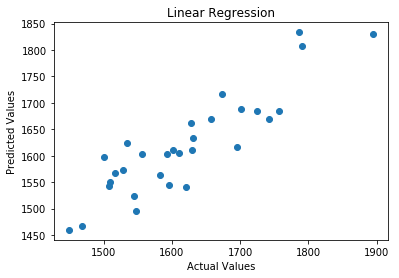

In [982]:
scatter(y, y_pred, "Linear Regression", "Actual Values", "Predicted Values")

An R^2 of .79 is strong, but there are other ways to try to improve on this.
One way is to use the test_train_split function from sklearn where we can designate a certain percent of the data to train our model on and then we can test it on the rest.
We can start by training on 30%.

#### Train on 30%

1965.7520937078011
3763.911240693663
0.07033880633221809


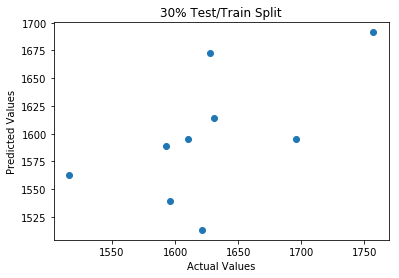

In [988]:
train(.30, 30,  "30% Test/Train Split", "Actual Values","Predicted Values")

Testing on 30% of the data did gave us a worse score than before, 0.703 vs .789.  Our training MSE is larger than the testing at 1966 vs 3764, so it is possible we are overfitting.  The scatterplot gives us a better understanding as we see that testing on 30% of 30 data points is only 9 observations.  This is most likely too few data points to be using.

Since 30% was too few data points testing on 50% may perform better.

#### Train on 50%

2476.8300468675525
2684.228809055235
0.7883411898572972


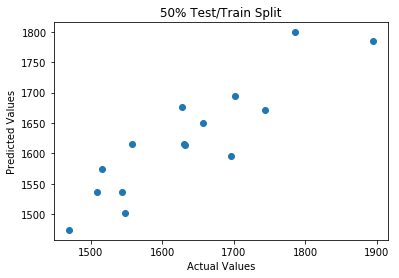

In [989]:
train(.50, 50,"50% Test/Train Split", "Actual Values","Predicted Values")

Our score of 0.788 is better than when testing on 30%, but it's slightly less than our original score.  In this case we should try to use cross validation as this may work better for our small dataset.

#### Cross Validation

With a small dataset it is best to use Leave One Out Cross Validation meaning we use K splits where K is the number of rows in our data.  We can then run K Cross Validation models using the train.test split method.  Once all of these are run we can use the mean of the result.

There are 30 rows so we will use K=30

In [985]:
kf = model_selection.KFold(n_splits=30, shuffle=True)

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of R2 for all folds: 0.7875982862041571


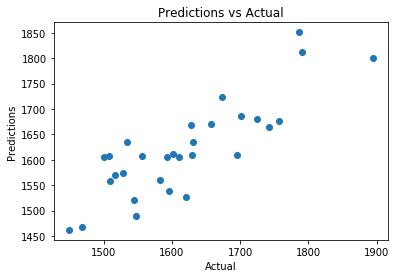

In [986]:
crossval(X,y)

This result is almost the exact same as our original score when using only a linear regression (.788 vs.789).  These scores are very close, but we are better off going with the score we found from our cross validation as this is less prone to overfitting.  Having used only 3 variables to calculate this we could try to add another as usually 3-4 variables are used when creating a model.  If we expand our cuttoff to 0.65 we could include BB_Pct as well.  This is still a strong correlation and walks are one of the biggest statistics used by baseball statistian as well as a leading factor in driving the sabermetric movement.  Bsed on this it would be a good variable to use if it can improve our model.

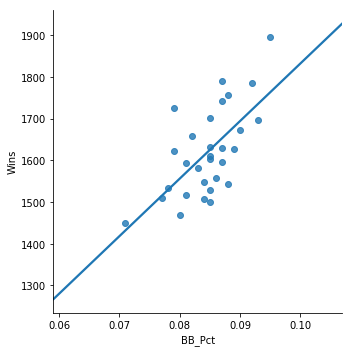

In [990]:
plotfunct('BB_Pct', "Wins", bball_data)

In [991]:
feature_cols = bball_data[['RAR_yr', 'wRC_plus', 'OBP', 'BB_Pct']]
X = feature_cols

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of R2 for all folds: 0.8082798585522154


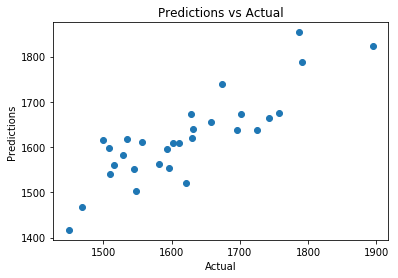

In [992]:
#Run this again using our four variables
crossval(X,y)

Including BB_Pct did improve our model raising our R^2 value to .808, which is a very strong score.  We can test it out on some data from this current year.

### Using our Model

We can see how our model would predict teams to do so far in the 2018 season.  Currently the Yankees and Red Sox have the best records in baseball and are always an exciting rivalry to watch.  Below we can see how well they should be doing based on our model.

The Yankees and Red Sox values for RAR, RC_plus, OBP, and BB_Pct are as follows so far in 2018:
- Yankees 125.8, 116, .331, .10
- Red Sox 118.7, 111, .329, .083

Since we used 20 years worth of data we need to divide the output by 20.  Additionally the data we are using is only through 63 and 69 games respectively meaning the RAR values will need to be converted based on these values

In [995]:
#For the Yankees 
prediction(X,y,30,125.8, 116, .331, .10, 162, 63, 63/162, "Yankees")

Yankees: [39.12900386]


The Yankees currently have a 43-20 record, but according to the model should have a 39-24 record, which is not far off.

In [996]:
#For the Red Sox
prediction(X,y,30, 118.7, 111, .329, .083, 162,69, 69/162, "Red Sox")

Red Sox: [39.2737211]


The Red Sox currently have a 47-22 record, but should only have a 39-30 record accordig to our model.

Another way to use our model is to look at who will finish with the best record in baseball.  The Yankees and Red Sox are contenders, but the Cubs, Astros, and Dodgers also favorites. Their statistics for RAR, RC_plus, OBP, and BB_Pct are as follow.
- Cubs:  133.8	103  .339 .0903
- Astros: 130.6 114 .333 .089


In [997]:
prediction(X, y, 30, 125.8, 116, .331, .10, 162, 63, 1, "Yankees")

Yankees: [100.83644452]


In [998]:
prediction(X, y, 30, 118.7, 111, .329, .083, 162, 69, 1, "Red Sox")

Red Sox: [91.78849947]


In [999]:
prediction(X, y, 30, 133.8,103,  .339, .0903, 162, 65, 1, "Cubs")

Cubs: [97.38110863]


In [1000]:
prediction(X, y, 30, 130.6, 114, .333, .089, 162, 70, 1, "Astros")

Astros: [96.64541499]


Based on our model the top teams would finish as follows:
- Yankees 101 Wins
- Cubs 97 Wins
- Astros 97 Wins
- Red Sox 92 Wins

### Future Steps:


- As you may have noticed, this algorithm only considers hitters statistics.  In order to improve the model, pitching should be included as well.  
- WAR may be a good variable to include as well. It was not included in our dataset, but would probably be a strong predictor.
- 30 data points may not have been enough.  I could try to fix this by breaking up the teams wins and statistics by year and using that data in the model.